In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score
import joblib

In [4]:
# Load data
dataset = pd.read_csv('C:/Users/vishw/Projects/Solaris/datasets/household_energy_data.csv')

In [5]:
dataset.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,temperature,humidity,precipitation,cloud_cover,wind_speed,wind_direction,is_day,GHI,GTI
0,2022-01-02 00:00:00,1.882467,0.102433,240.96184,8.126667,0.0,28.0,0.0,1854.4667,18.5,82,0.0,13,7.3,70,0,0.0,0.0
1,2022-01-02 01:00:00,3.349400,0.136933,240.44833,14.246667,0.0,1514.0,0.0,1835.4000,18.4,80,0.0,0,5.4,48,0,0.0,0.0
2,2022-01-02 02:00:00,1.587267,0.078233,245.81866,6.870000,0.0,34.0,0.0,1553.2666,18.0,79,0.0,0,5.9,43,0,0.0,0.0
3,2022-01-02 03:00:00,1.662200,0.079533,244.51349,7.206666,0.0,46.0,0.0,1616.2000,17.4,81,0.0,0,7.7,49,0,0.0,0.0
4,2022-01-02 04:00:00,2.215767,0.093467,243.85550,9.333333,0.0,34.0,533.0,1648.7666,17.0,81,0.0,0,7.3,57,0,0.0,0.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28272 entries, 0 to 28271
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Datetime               28272 non-null  object 
 1   Global_active_power    28272 non-null  float64
 2   Global_reactive_power  28272 non-null  float64
 3   Voltage                28272 non-null  float64
 4   Global_intensity       28272 non-null  float64
 5   Sub_metering_1         28272 non-null  float64
 6   Sub_metering_2         28272 non-null  float64
 7   Sub_metering_3         28272 non-null  float64
 8   Sub_metering_4         28272 non-null  float64
 9   temperature            28272 non-null  float64
 10  humidity               28272 non-null  int64  
 11  precipitation          28272 non-null  float64
 12  cloud_cover            28272 non-null  int64  
 13  wind_speed             28272 non-null  float64
 14  wind_direction         28272 non-null  int64  
 15  is

In [7]:
dataset = dataset.astype({col: 'int32' for col in dataset.select_dtypes('int64').columns})
dataset = dataset.astype({col: 'float32' for col in dataset.select_dtypes('float64').columns})
dataset['is_day'] = dataset['is_day'].astype('bool')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28272 entries, 0 to 28271
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Datetime               28272 non-null  object 
 1   Global_active_power    28272 non-null  float32
 2   Global_reactive_power  28272 non-null  float32
 3   Voltage                28272 non-null  float32
 4   Global_intensity       28272 non-null  float32
 5   Sub_metering_1         28272 non-null  float32
 6   Sub_metering_2         28272 non-null  float32
 7   Sub_metering_3         28272 non-null  float32
 8   Sub_metering_4         28272 non-null  float32
 9   temperature            28272 non-null  float32
 10  humidity               28272 non-null  int32  
 11  precipitation          28272 non-null  float32
 12  cloud_cover            28272 non-null  int32  
 13  wind_speed             28272 non-null  float32
 14  wind_direction         28272 non-null  int32  
 15  is

In [9]:
dataset.columns

Index(['Datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Sub_metering_4', 'temperature', 'humidity',
       'precipitation', 'cloud_cover', 'wind_speed', 'wind_direction',
       'is_day', 'GHI', 'GTI'],
      dtype='object')

In [10]:
X = dataset[['temperature', 'humidity', 'precipitation', 'cloud_cover', 'is_day']]
y = dataset['Global_active_power']

In [11]:
# Assuming X and y are already defined
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

         Feature  Importance
0    temperature    0.384348
1       humidity    0.315950
3    cloud_cover    0.232961
2  precipitation    0.039402
4         is_day    0.027339


temperature      0.081571
is_day           0.074721
precipitation   -0.063668
cloud_cover     -0.168024
humidity        -0.233599
dtype: float64


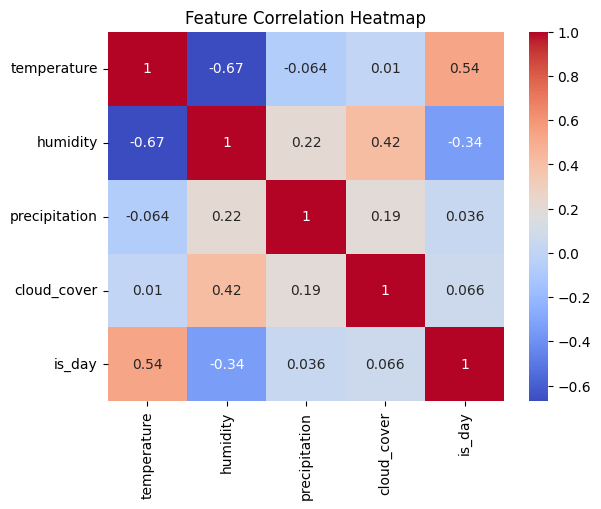

In [12]:
# Check correlation matrix
correlation_matrix = X.corrwith(y).sort_values(ascending=False)
print(correlation_matrix)

# Plot correlation heatmap
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
from sklearn.feature_selection import f_regression

# Run F-test to check significance
f_values, p_values = f_regression(X, y)
p_values_forecast_df = pd.DataFrame({'Feature': X.columns, 'P-value': p_values})
print(p_values_forecast_df.sort_values(by='P-value'))

         Feature        P-value
1       humidity   0.000000e+00
3    cloud_cover  4.436540e-178
0    temperature   6.029594e-43
4         is_day   2.690901e-36
2  precipitation   8.585253e-27


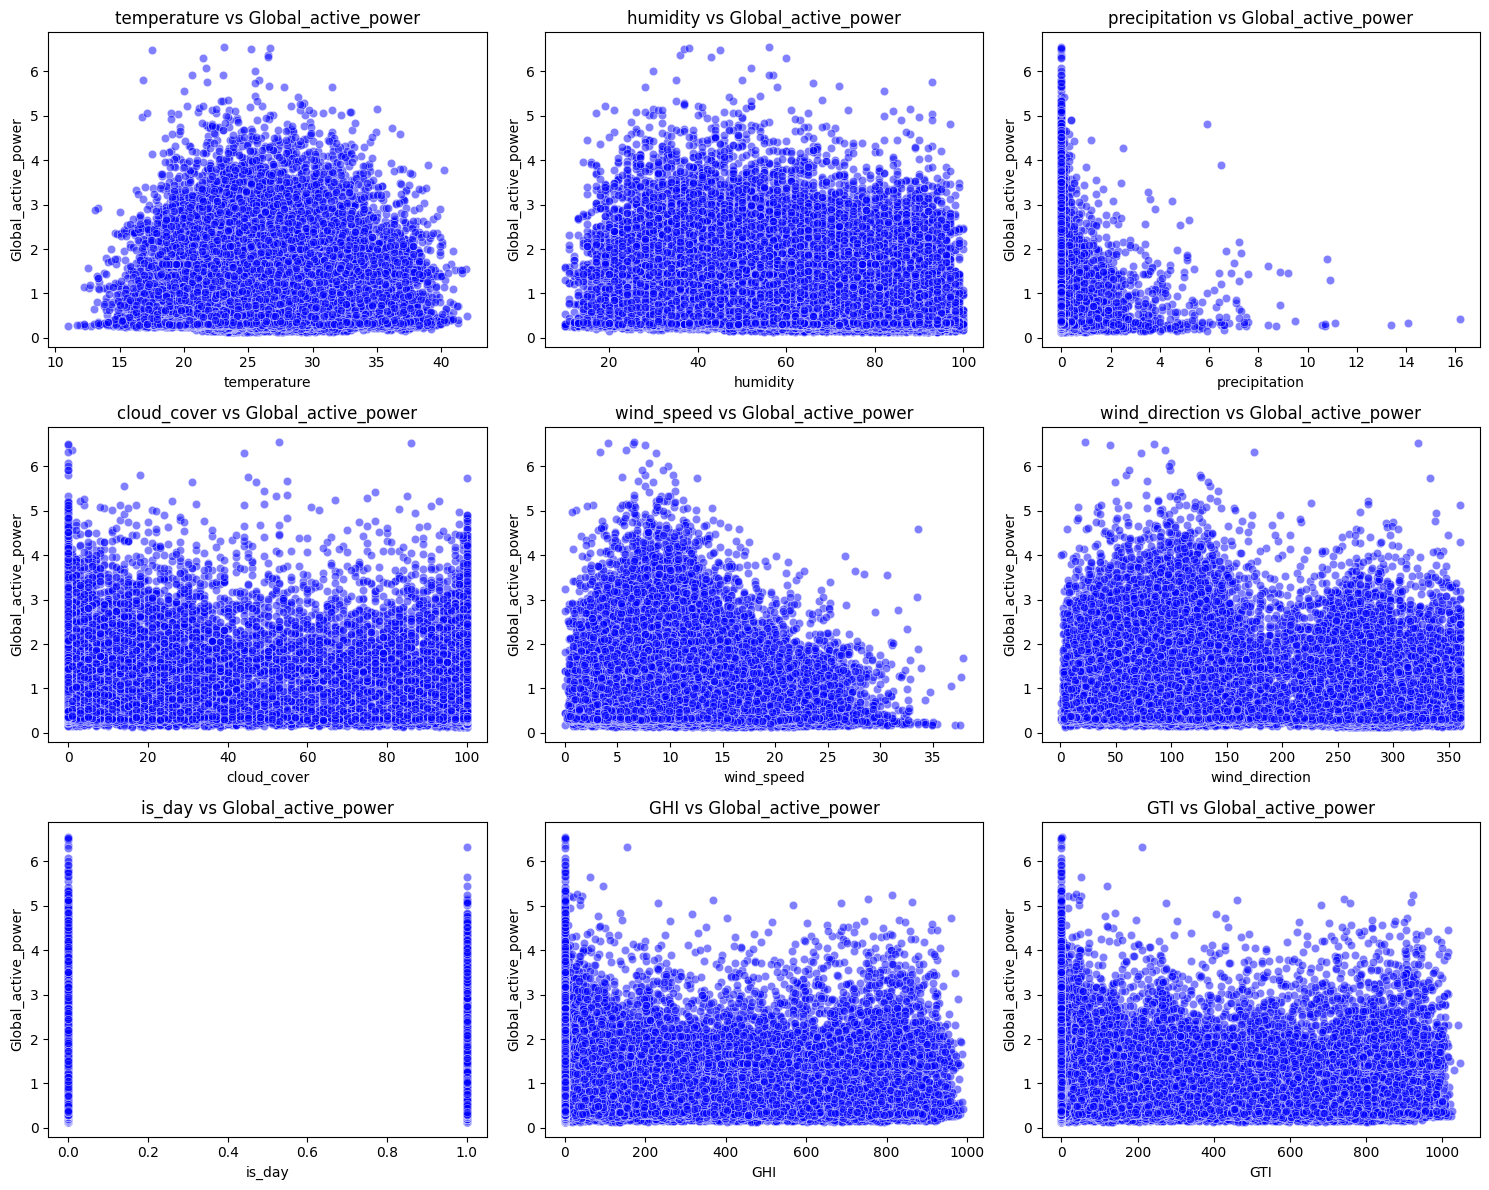

In [14]:
# Define feature columns and target
X_columns = ['temperature', 'humidity', 'precipitation', 'cloud_cover', 
             'wind_speed', 'wind_direction', 'is_day', 'GHI', 'GTI']
y_column = 'Global_active_power'

# Create scatter plots for each feature vs Global_active_power
plt.figure(figsize=(15, 12))

for i, column in enumerate(X_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=dataset[column], y=dataset[y_column], alpha=0.5, color='blue')
    plt.title(f'{column} vs {y_column}')
    plt.xlabel(column)
    plt.ylabel(y_column)

plt.tight_layout()
plt.show()

In [15]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21204, 5), (7068, 5), (21204,), (7068,))

In [17]:
models={'name':[], 'model':[], 'pred':[], 'mae':[], 'mape':[], 'mse':[], 'rmse':[], 'r2':[]}
i=0

In [18]:
models['model'].append(LinearRegression())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Linear Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Linear Regression:
MAE: 0.7084761548086601
MAPE: 1.2417175813372496
MSE: 0.8064471043447117
R2: 0.05911543485558468


In [19]:
models['model'].append(Lasso())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Lasso Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Lasso Regression:
MAE: 0.7165058154249895
MAPE: 1.2714325926733536
MSE: 0.8101603467678143
R2: 0.05478318235729396


In [20]:
models['model'].append(Ridge())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Ridge Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Ridge Regression:
MAE: 0.7084770599113495
MAPE: 1.241720373386324
MSE: 0.8064464505472952
R2: 0.059116197643242496


In [21]:
models['model'].append(ElasticNet())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('ElasticNet Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

ElasticNet Regression:
MAE: 0.7140435340313446
MAPE: 1.2622609945167658
MSE: 0.8091834571036902
R2: 0.05592292283360245


In [22]:
models['model'].append(SVR())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('SVR')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

SVR:
MAE: 0.6692233030367636
MAPE: 0.8904393586667172
MSE: 0.8547538915570385
R2: 0.002755742775437886


In [23]:
models['model'].append(RandomForestRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Random Forest Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Random Forest Regressor:
MAE: 0.7167242049045327
MAPE: 1.2118496266112708
MSE: 0.8846725576712988
R2: -0.03215046620585715


In [24]:
models['model'].append(KNeighborsRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('K Neighbors Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

K Neighbors Regressor:
MAE: 0.72225434
MAPE: 1.2027702960216806
MSE: 0.89669687
R2: -0.04617929458618164


In [25]:
models['model'].append(DecisionTreeRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Decision Tree Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Decision Tree Regressor:
MAE: 0.8950739907333937
MAPE: 1.3727082975711267
MSE: 1.5241775491814993
R2: -0.7782631034800362


In [26]:
models['model'].append(XGBRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('XGB Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

XGB Regressor:
MAE: 0.68331295
MAPE: 1.1575656972481156
MSE: 0.79638296
R2: 0.0708572268486023


In [27]:
results = pd.DataFrame({
    'name': models['name'],
    'mae': models['mae'],
    'mape': models['mape'],
    'mse': models['mse'],
    'rsme': models['rmse'],
    'r2': models['r2']
})

results

,name,mae,mape,mse,rsme,r2
0,Linear Regression,0.708476,1.241718,0.806447,0.898024,0.059115
1,Lasso Regression,0.716506,1.271433,0.810160,0.900089,0.054783
2,Ridge Regression,0.708477,1.241720,0.806446,0.898024,0.059116
3,ElasticNet Regression,0.714044,1.262261,0.809183,0.899546,0.055923
4,SVR,0.669223,0.890439,0.854754,0.924529,0.002756
5,Random Forest Regressor,0.716724,1.211850,0.884673,0.940570,-0.032150
6,K Neighbors Regressor,0.722254,1.202770,0.896697,0.946941,-0.046179
7,Decision Tree Regressor,0.895074,1.372708,1.524178,1.234576,-0.778263
8,XGB Regressor,0.683313,1.157566,0.796383,0.892403,0.070857


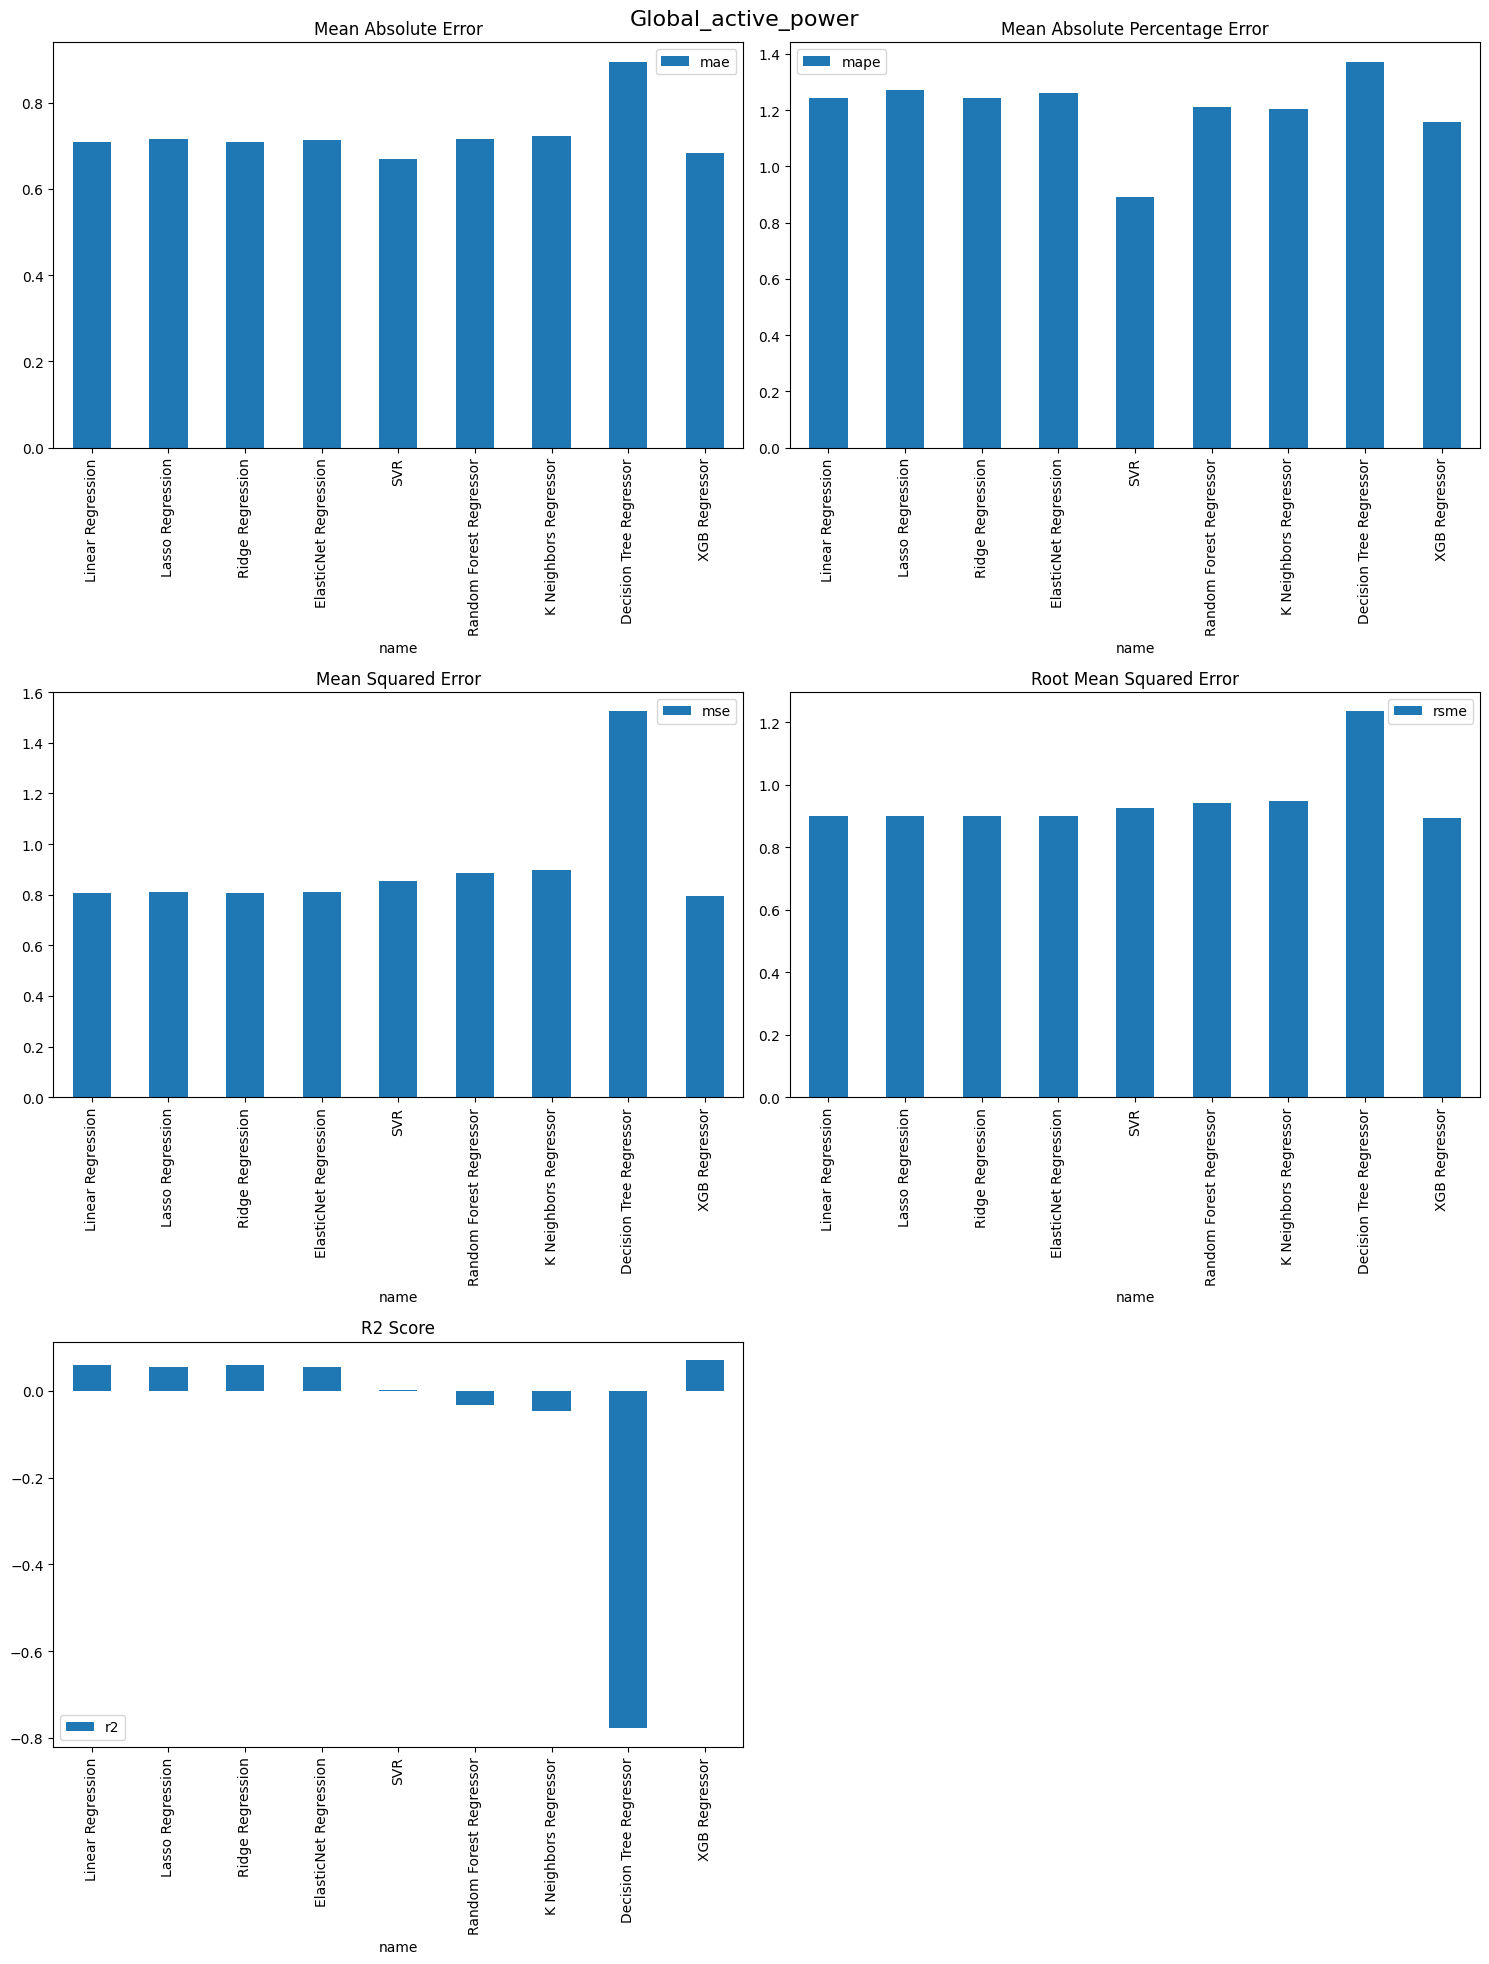

In [28]:
# Create a 3x2 grid (3 rows, 2 columns) with shared x-axis
fig, axes = plt.subplots(3, 2, figsize=(15, 20))  # 3x2 grid, adjust size as needed
fig.suptitle('Global_active_power', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each metric
results.plot.bar(x='name', y='mae', title='Mean Absolute Error', ax=axes[0])
results.plot.bar(x='name', y='mape', title='Mean Absolute Percentage Error', ax=axes[1])
results.plot.bar(x='name', y='mse', title='Mean Squared Error', ax=axes[2])
results.plot.bar(x='name', y='rsme', title='Root Mean Squared Error', ax=axes[3])
results.plot.bar(x='name', y='r2', title='R2 Score', ax=axes[4])

# Hide empty subplot if there's an extra grid space
axes[5].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [32]:
best_model = models['model'][5]
joblib.dump(best_model, 'C:/Users/vishw/Projects/Solaris/ml_models/household_energy_model.pkl')

['C:/Users/vishw/Projects/Solaris/ml_models/household_energy_model.pkl']